<a href="https://colab.research.google.com/github/iam-pattan/DL/blob/master/Sentiment_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Air data preprocessing 

In [7]:
import tensorflow as tf
from tensorflow.keras.layers import Embedding
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.text import one_hot
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re

In [8]:
train_path = 'https://raw.githubusercontent.com/AnubhavJohri/Twitter-US-Airline-Sentiment-Analysis/master/Twitter%20US%20Airline%20Sentiment%20Analysis/Dataset/training_data.csv'
test_path = 'https://raw.githubusercontent.com/AnubhavJohri/Twitter-US-Airline-Sentiment-Analysis/master/Twitter%20US%20Airline%20Sentiment%20Analysis/Dataset/test_data.csv'

In [9]:
train = pd.read_csv(train_path, error_bad_lines=False)
test = pd.read_csv(test_path, error_bad_lines=False)

In [10]:
train.head()

,tweet_id,airline_sentiment,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,567900433542488064,negative,Southwest,NaN,ColeyGirouard,NaN,0,"@SouthwestAir I am scheduled for the morning, ...",NaN,2015-02-17 20:16:29 -0800,Washington D.C.,Atlantic Time (Canada)
1,569989168903819264,positive,Southwest,NaN,WalterFaddoul,NaN,0,@SouthwestAir seeing your workers time in and ...,NaN,2015-02-23 14:36:22 -0800,"Indianapolis, Indiana; USA",Central Time (US & Canada)
2,568089179520954368,positive,United,NaN,LocalKyle,NaN,0,@united Flew ORD to Miami and back and had gr...,NaN,2015-02-18 08:46:29 -0800,Illinois,Central Time (US & Canada)
3,568928195581513728,negative,Southwest,NaN,amccarthy19,NaN,0,@SouthwestAir @dultch97 that's horse radish 😤🐴,NaN,2015-02-20 16:20:26 -0800,NaN,Atlantic Time (Canada)
4,568594180014014464,negative,United,NaN,J_Okayy,NaN,0,@united so our flight into ORD was delayed bec...,NaN,2015-02-19 18:13:11 -0800,NaN,Eastern Time (US & Canada)


In [11]:
train.columns

Index(['tweet_id', 'airline_sentiment', 'airline', 'airline_sentiment_gold',
       'name', 'negativereason_gold', 'retweet_count', 'text', 'tweet_coord',
       'tweet_created', 'tweet_location', 'user_timezone'],
      dtype='object')

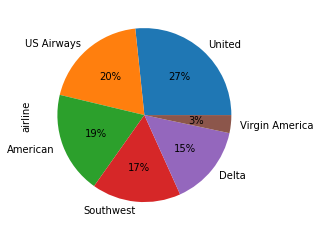

In [12]:
train.airline.value_counts().plot(kind='pie', autopct='%1.0f%%')

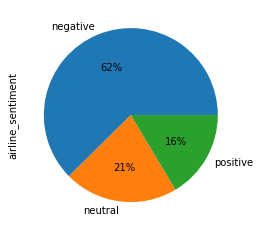

In [13]:
train.airline_sentiment.value_counts().plot(kind='pie', autopct='%1.0f%%')

In [14]:
train.groupby(['airline', 'airline_sentiment']).airline.count().unstack()

airline_sentiment,negative,neutral,positive
airline,,,
American,1468,359,251
Delta,691,535,413
Southwest,870,512,435
US Airways,1678,277,197
United,2011,517,400
Virgin America,133,127,106


In [15]:
features = train.iloc[:, 7].values
labels = train.iloc[:, 1].values
features, labels

(array(['@SouthwestAir I am scheduled for the morning, 2 days after the fact, yes..not sure why my evening flight was the only one Cancelled Flightled',
        '@SouthwestAir seeing your workers time in and time out going above and beyond is why I love flying with you guys. Thank you!',
        '@united Flew ORD to Miami and back and  had great crew, service on both legs. THANKS',
        ..., '@usairways the. Worst. Ever. #dca #customerservice',
        '@nrhodes85: look! Another apology. DO NOT FLY @USAirways',
        '@united you are by far the worst airline. 4 plane delays on 1 round trip flight. How is that possible.'],
       dtype=object),
 array(['negative', 'positive', 'positive', ..., 'negative', 'negative',
        'negative'], dtype=object))

In [16]:
processed_features = []

for sentence in range(0, len(features)):
    # Remove all the special characters
    processed_feature = re.sub(r'^@\S+', ' ', str(features[sentence]))

    # Removing airlines mentioned
    processed_feature = re.sub(r'\W', ' ', processed_feature)

    # remove all single characters
    processed_feature= re.sub(r'\s+[a-zA-Z]\s+', ' ', processed_feature)

    # Remove single characters from the start
    processed_feature = re.sub(r'\^[a-zA-Z]\s+', ' ', processed_feature) 

    # Substituting multiple spaces with single space
    processed_feature = re.sub(r'\s+', ' ', processed_feature, flags=re.I)

    # Removing prefixed 'b'
    processed_feature = re.sub(r'^b\s+', '', processed_feature)
    
    # Removing decimals
    processed_feature = re.sub(r'\d+', '', processed_feature)

    # Converting to Lowercase
    processed_feature = processed_feature.lower()

    processed_features.append(processed_feature)

In [17]:
processed_features

[' am scheduled for the morning  days after the fact yes not sure why my evening flight was the only one cancelled flightled',
 ' seeing your workers time in and time out going above and beyond is why love flying with you guys thank you ',
 ' flew ord to miami and back and had great crew service on both legs thanks',
 ' dultch that horse radish ',
 ' so our flight into ord was delayed because of air force one but the last flight to sbn is at    mins from now we just landed ',
 ' why did you load us in this flying sardine can if you knew the pilots were  hours late flight incompetent beyond belief',
 ' that is stock response delays not as frustrating as poor cust serv amp being told by  ppl to wait amp they come back but did not ',
 ' that be nice hoping to rack up enough miles to take trip to seattle and enjoy perfect latte in the city of coffee ',
 ' frankly worse customer service ever problems will happen how you deal defines company never again united ',
 ' yeah haha never been in o

In [18]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
labels = le.fit_transform(labels)
labels

array([0, 2, 2, ..., 0, 0, 0])

## tf-idf

In [19]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(max_features=2500, min_df=7, max_df=0.8, stop_words=stopwords.words('english'))
vect_features = vectorizer.fit_transform(processed_features).toarray()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [20]:
vect_features

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [21]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(vect_features, labels, test_size=0.2, random_state=0)

In [22]:
X_train, y_train

(array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]), array([2, 0, 0, ..., 0, 2, 0]))

In [23]:
from sklearn.ensemble import RandomForestClassifier

text_classifier = RandomForestClassifier(n_estimators=200, random_state=0)
text_classifier.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [24]:
predictions = text_classifier.predict(X_test)

In [25]:
from sklearn.metrics import confusion_matrix, accuracy_score

print(confusion_matrix(y_test,predictions))
print('accuracy score',accuracy_score(y_test, predictions))

[[1263   82   36]
 [ 211  195   51]
 [ 110   47  201]]
accuracy score 0.755464480874317


## word embedding

In [29]:
import tensorflow as tf
from tensorflow.keras.layers import Embedding, GlobalAveragePooling1D, Dense
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
# from tensorflow.keras.preprocessing.text import one_hot

In [30]:
train_seq = processed_features[:8784]
test_seq = processed_features[8784:]
train_lab = labels[:8784]
test_lab = labels[8784:]

In [31]:
# onehot_repr = tqdm([one_hot(str(line), 1000) for line in lis]) 
# print(onehot_repr)

from tensorflow.keras.preprocessing.text import Tokenizer
tokenizer = Tokenizer()
tokenizer.fit_on_texts(processed_features)
word_index = tokenizer.word_index

train_sequence = tokenizer.texts_to_sequences(train_seq)
test_sequence = tokenizer.texts_to_sequences(test_seq)
train_padded = pad_sequences(train_sequence, maxlen=30, padding='post')
test_padded = pad_sequences(test_sequence, maxlen=30, padding='post')

In [32]:
train_padded.shape, test_padded.shape, train_padded[0]

((8784, 30),
 (2196, 30),
 array([ 67, 552,   4,   2, 222, 163,  84,   2, 835, 158,  18, 219,  63,
          8, 893,   5,  19,   2, 105,  65,  33,  75,   0,   0,   0,   0,
          0,   0,   0,   0], dtype=int32))

In [55]:
import os, datetime
logdir = os.path.join("logs", datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))
tensorboard_callback = tf.keras.callbacks.TensorBoard(logdir, histogram_freq=1)

In [56]:
model=Sequential()
model.add(Embedding(15000, 20, input_length = 50))
model.add(GlobalAveragePooling1D())
model.add(Dense(24, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='mse', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_5 (Embedding)      (None, 50, 20)            300000    
_________________________________________________________________
global_average_pooling1d_1 ( (None, 20)                0         
_________________________________________________________________
dense_8 (Dense)              (None, 24)                504       
_________________________________________________________________
dense_9 (Dense)              (None, 1)                 25        
Total params: 300,529
Trainable params: 300,529
Non-trainable params: 0
_________________________________________________________________


In [71]:
hist = model.fit(train_padded, train_lab, epochs=20, validation_data=(test_padded, test_lab))

Epoch 1/20
275/275 [==============================] - 2s 8ms/step - loss: 0.1795 - accuracy: 0.8223 - val_loss: 0.3586 - val_accuracy: 0.6922
Epoch 2/20
275/275 [==============================] - 2s 8ms/step - loss: 0.1791 - accuracy: 0.8224 - val_loss: 0.3587 - val_accuracy: 0.6885
Epoch 3/20
275/275 [==============================] - 2s 8ms/step - loss: 0.1784 - accuracy: 0.8232 - val_loss: 0.3599 - val_accuracy: 0.6840
Epoch 4/20
275/275 [==============================] - 2s 8ms/step - loss: 0.1776 - accuracy: 0.8240 - val_loss: 0.3610 - val_accuracy: 0.6858
Epoch 5/20
275/275 [==============================] - 2s 8ms/step - loss: 0.1777 - accuracy: 0.8234 - val_loss: 0.3639 - val_accuracy: 0.6771
Epoch 6/20
275/275 [==============================] - 2s 8ms/step - loss: 0.1768 - accuracy: 0.8251 - val_loss: 0.3673 - val_accuracy: 0.6781
Epoch 7/20
275/275 [==============================] - 2s 8ms/step - loss: 0.1765 - accuracy: 0.8243 - val_loss: 0.3680 - val_accuracy: 0.6799
Epoch 

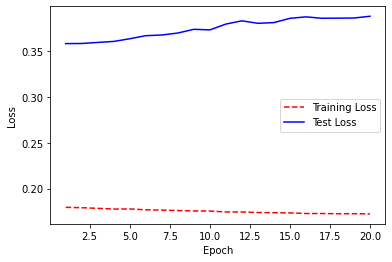

In [72]:
# Get training and test loss histories
training_loss = hist.history['loss']
test_loss = hist.history['val_loss']

# Create count of the number of epochs
epoch_count = range(1, len(training_loss) + 1)

# Visualize loss history
plt.plot(epoch_count, training_loss, 'r--')
plt.plot(epoch_count, test_loss, 'b-')
plt.legend(['Training Loss', 'Test Loss'])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show();

In [73]:
model.predict(test_padded)

array([[0.9910766 ],
       [0.00280056],
       [0.99066305],
       ...,
       [0.00234581],
       [0.00541923],
       [0.00211333]], dtype=float32)

## LSTM

In [36]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Bidirectional, LSTM, Dense

In [37]:
model=Sequential()
model.add(Embedding(15000, 20, input_length = 50))
model.add(Bidirectional(LSTM(50, activation='relu')))
model.add(Dense(24, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='mse', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_4 (Embedding)      (None, 50, 20)            300000    
_________________________________________________________________
bidirectional_3 (Bidirection (None, 100)               28400     
_________________________________________________________________
dense_6 (Dense)              (None, 24)                2424      
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 25        
Total params: 330,849
Trainable params: 330,849
Non-trainable params: 0
_________________________________________________________________


In [38]:
hist = model.fit(train_padded, train_lab, epochs=20, validation_data=(test_padded, test_lab))

Epoch 1/20
275/275 [==============================] - 43s 138ms/step - loss: 0.5071 - accuracy: 0.4679 - val_loss: 0.3531 - val_accuracy: 0.6999
Epoch 2/20
275/275 [==============================] - 38s 137ms/step - loss: 0.3035 - accuracy: 0.7071 - val_loss: 0.3384 - val_accuracy: 0.6954
Epoch 3/20
275/275 [==============================] - 38s 138ms/step - loss: 0.2539 - accuracy: 0.7493 - val_loss: 0.3429 - val_accuracy: 0.7013
Epoch 4/20
275/275 [==============================] - 37s 136ms/step - loss: 0.2392 - accuracy: 0.7676 - val_loss: 0.3565 - val_accuracy: 0.6812
Epoch 5/20
275/275 [==============================] - 37s 136ms/step - loss: 0.2247 - accuracy: 0.7769 - val_loss: 0.3591 - val_accuracy: 0.7081
Epoch 6/20
275/275 [==============================] - 37s 135ms/step - loss: 0.2332 - accuracy: 0.7725 - val_loss: 0.3488 - val_accuracy: 0.6935
Epoch 7/20
275/275 [==============================] - 38s 139ms/step - loss: 0.2056 - accuracy: 0.7966 - val_loss: 0.3516 - val_ac

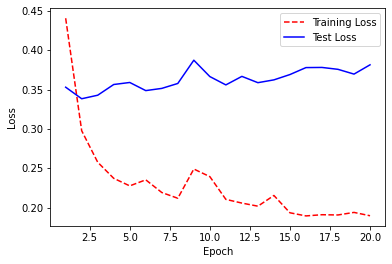

In [40]:
# Get training and test loss histories
training_loss = hist.history['loss']
test_loss = hist.history['val_loss']

# Create count of the number of epochs
epoch_count = range(1, len(training_loss) + 1)

# Visualize loss history
plt.plot(epoch_count, training_loss, 'r--')
plt.plot(epoch_count, test_loss, 'b-')
plt.legend(['Training Loss', 'Test Loss'])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show();